## Importing libraries

In [80]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


## Reading training data

In [133]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
1,1,1,37,1,0,71.2833,C,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,37,1,0,53.1000,S,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,1,37,0,0,51.8625,S,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,1,3,23,1,1,16.7000,S,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11,1,1,37,0,0,26.5500,S,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Exploratory analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

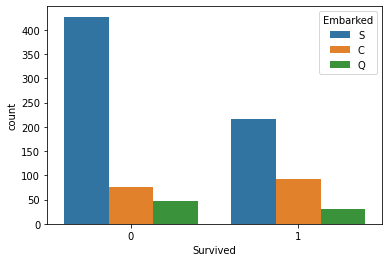

In [115]:
sns.countplot(x = 'Survived', hue='Embarked', data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

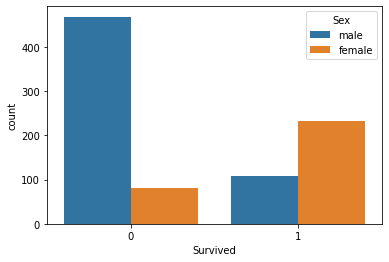

In [116]:
sns.countplot(x = 'Survived', hue='Sex', data=df_train)

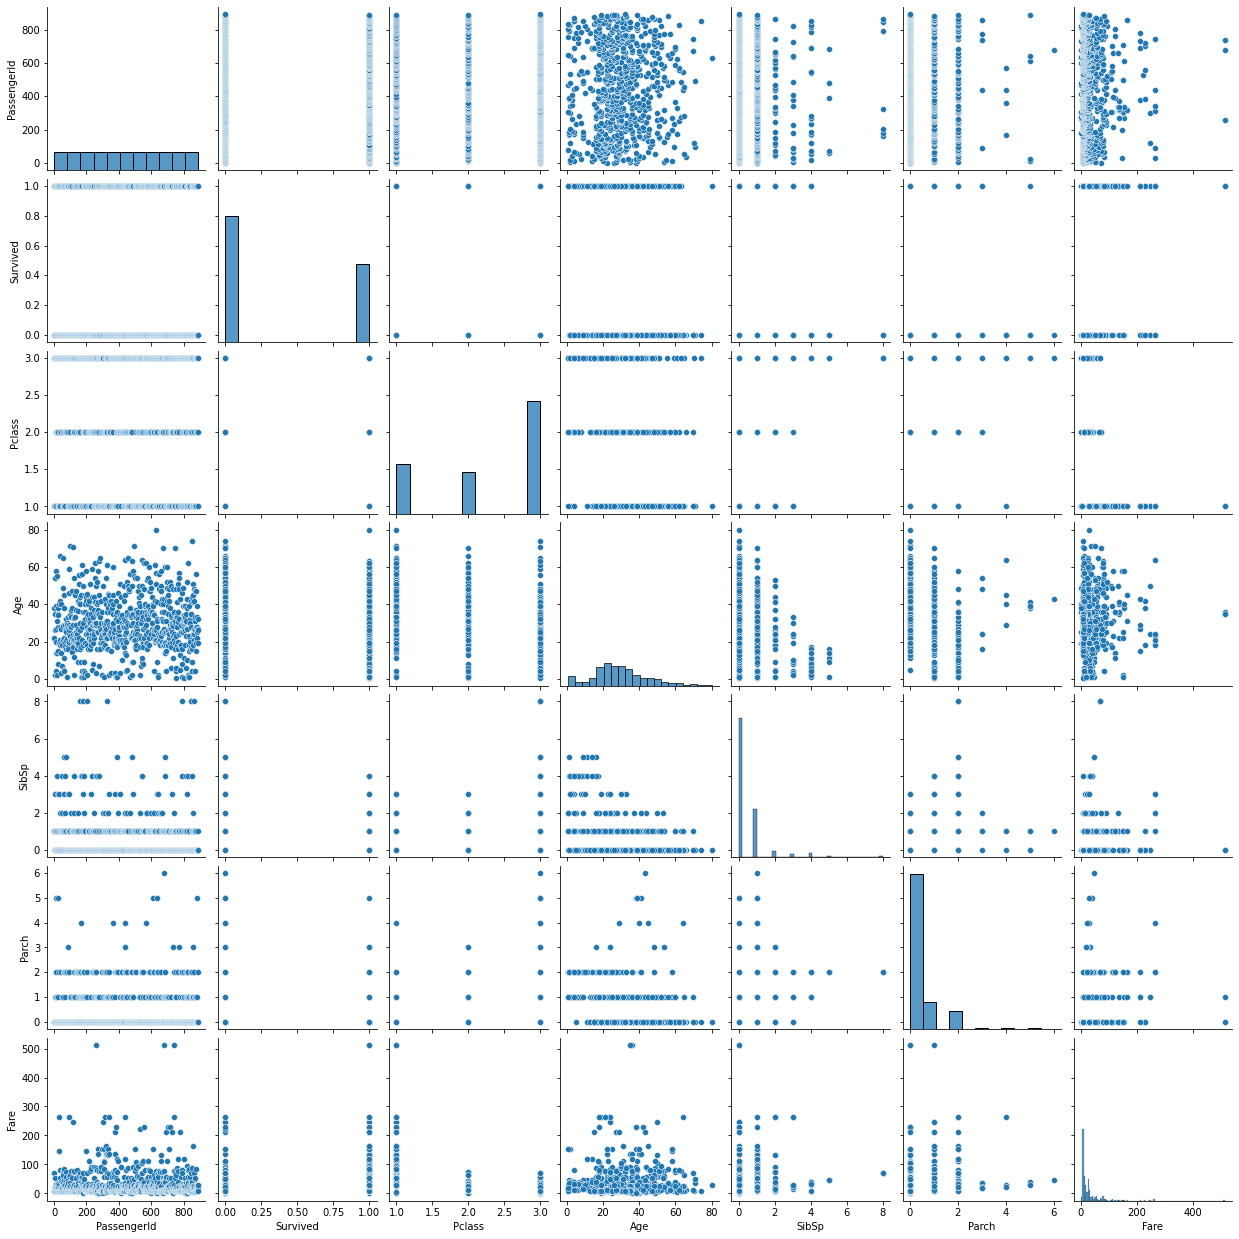

In [117]:
sns.pairplot(df_train)

<AxesSubplot:>

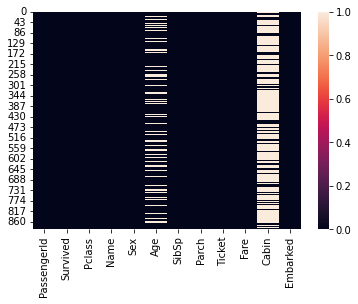

In [128]:
sns.heatmap(df_train.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

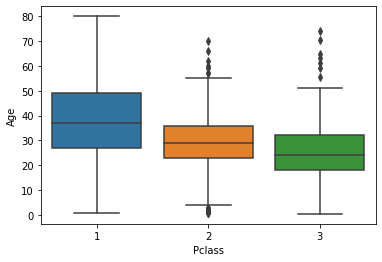

In [119]:
sns.boxplot(x = 'Pclass', y = 'Age', data=df_train)

## Data imputation

In [136]:
def fill_age(cols):
    col_age = cols[0]
    col_class = cols[1]
    if col_class == 1:
        col_age = 37
        return col_age
    elif col_class == 2:
        col_age = 28
        return col_age
    else:
        col_age = 23
        return col_age
    

In [137]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(fill_age, axis=1)
df_test['Age'] = df_test[['Age', 'Pclass']].apply(fill_age, axis=1)

<AxesSubplot:>

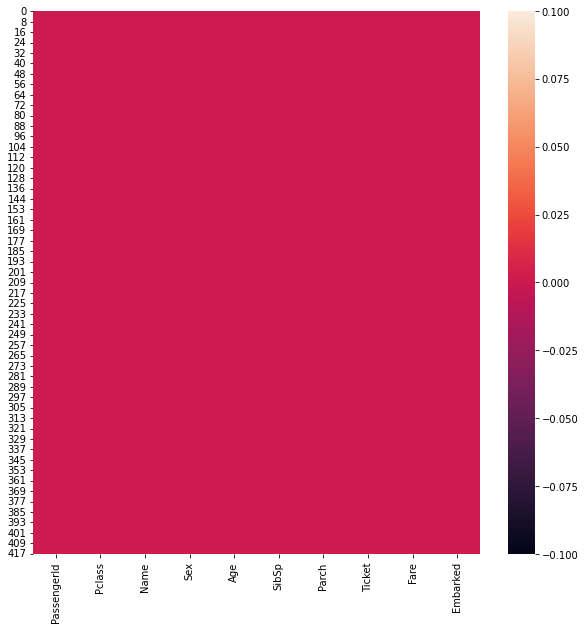

In [147]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_test.isnull())

In [141]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)


In [145]:
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [148]:
em_train = pd.get_dummies(df_train['Embarked'], drop_first=True)
em_test = pd.get_dummies(df_test['Embarked'], drop_first=True)

In [149]:
se_train = pd.get_dummies(df_train['Sex'], drop_first=True)
se_test = pd.get_dummies(df_test['Sex'], drop_first=True)

In [151]:
df_train = pd.concat([df_train, se_train, em_train], axis=1)
df_test = pd.concat([df_test, se_test, em_test], axis=1)

In [159]:
pc_train = pd.get_dummies(df_train['Pclass'], drop_first=True)
pc_test = pd.get_dummies(df_test['Pclass'], drop_first=True)

In [160]:
df_train = pd.concat([df_train, pc_train], axis=1)
df_test = pd.concat([df_test, pc_test], axis=1)

In [163]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,23,1,0,7.2500,1,0,1,0,1
1,1,37,1,0,71.2833,0,0,0,0,0
2,1,23,0,0,7.9250,0,0,1,0,1
3,1,37,1,0,53.1000,0,0,1,0,0
4,0,23,0,0,8.0500,1,0,1,0,1


In [153]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Sex'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Sex'], axis=1, inplace=True)

In [157]:
df_train.drop(['Embarked'], axis=1, inplace=True)
df_test.drop(['Embarked'], axis=1, inplace=True)

In [162]:
df_train.drop(['Pclass'], axis=1, inplace=True)
df_test.drop(['Pclass'], axis=1, inplace=True)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,23,0,0,7.8292,1,1,0,0,1
1,23,1,0,7.0000,0,0,1,0,1
2,28,0,0,9.6875,1,1,0,1,0
3,23,0,0,8.6625,1,0,1,0,1
4,23,1,1,12.2875,0,0,1,0,1


In [169]:
df_target_train = df_train['Survived'] 


In [170]:
df_train_feature = df_train.drop('Survived', axis=1)


In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df_train_feature, df_target_train, test_size=0.1)

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(df_test)

In [174]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [175]:
y_pred = log_reg.predict(x_val_scaled)

In [177]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        50
           1       0.76      0.56      0.65        39

    accuracy                           0.73        89
   macro avg       0.74      0.71      0.71        89
weighted avg       0.74      0.73      0.72        89

[[43  7]
 [17 22]]


In [179]:
y_pred_test = log_reg.predict(x_test_scaled)

In [180]:
y_pred_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,